In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
faulty_df_1 = pd.read_csv('data/FaultyMotorON_1.csv')
faulty_mic_data_1 = faulty_df_1['Volt']
normal_df_1 = pd.read_csv('data/NormalMotorON_2.csv')
normal_mic_data_1 = normal_df_1['Volt']
faulty_df_2 = pd.read_csv('data/ImbalancedMotorON_1.csv')
faulty_mic_data_2 = faulty_df_2['Volt']
normal_df_2 = pd.read_csv('data/NormalMotorON_1.csv')
normal_mic_data_2 = normal_df_2['Volt0']

In [3]:
sr = 40000

def get_fft(mic_data, sr):
    window = np.kaiser(len(mic_data), 10)
    mic_data = np.multiply(mic_data, window)
    mic_fft = np.fft.rfft(mic_data, norm="forward")
    mic_freq = np.fft.rfftfreq(len(mic_data), 1/sr)
    return mic_fft, mic_freq

In [4]:
faulty_fft, faulty_freq = get_fft(faulty_mic_data_1, sr)
normal_fft, normal_freq = get_fft(normal_mic_data_1, sr)
faulty_fft_2, faulty_freq_2 = get_fft(faulty_mic_data_2, sr)
normal_fft_2, normal_freq_2 = get_fft(normal_mic_data_2, 30000)
faulty_amplitude = np.abs(faulty_fft)
normal_amplitude = np.abs(normal_fft)
faulty_amplitude_2 = np.abs(faulty_fft_2)
normal_amplitude_2 = np.abs(normal_fft_2)

c:\Users\rarora\DataspellProjects\PredictiveAnalysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


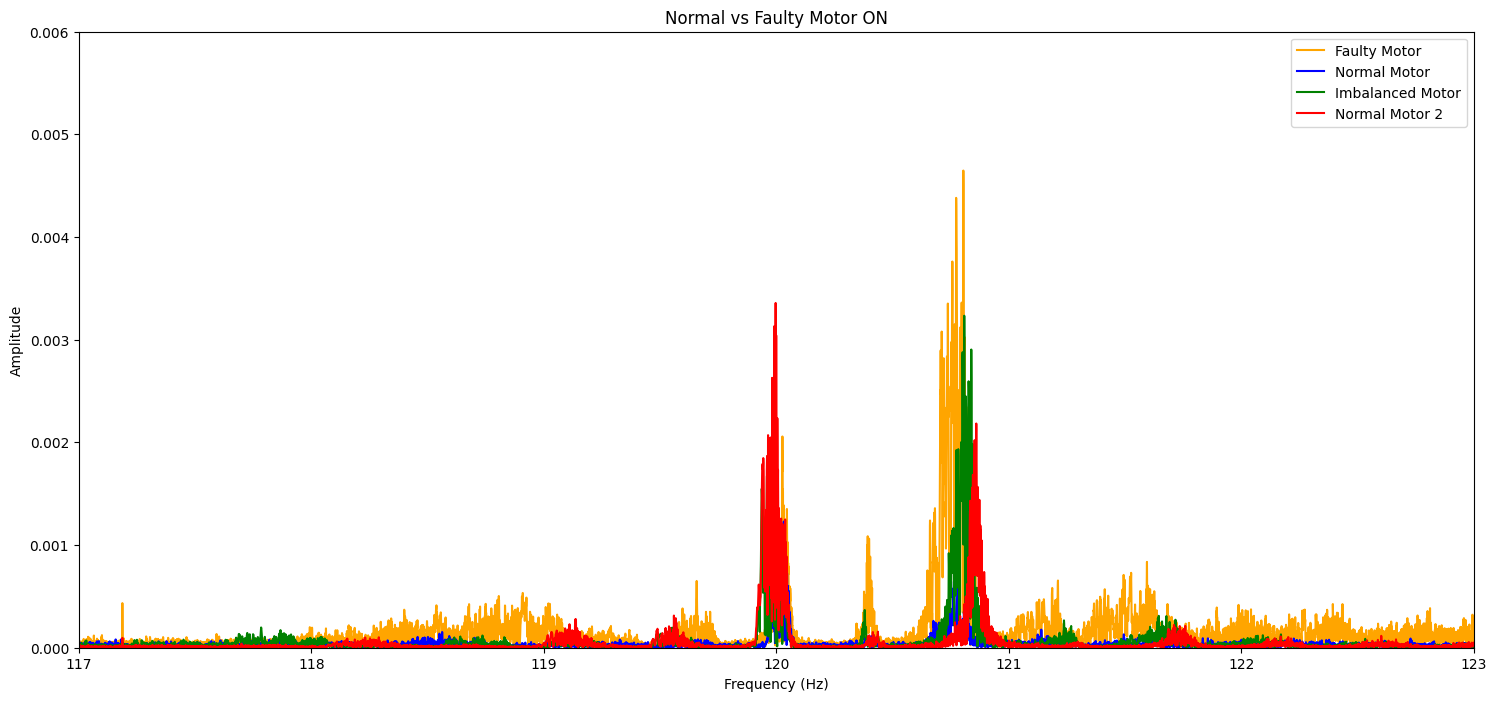

In [8]:
plt.figure(figsize=(18, 8))
#plt.axvline(116, color='r', linestyle='--')
#plt.axvline(257, color='r', linestyle='--')
#plt.axvline(152, color='r', linestyle='--')
plt.plot(faulty_freq, faulty_amplitude, color='orange', label='Faulty Motor')

plt.plot(normal_freq, normal_amplitude, color='blue', label='Normal Motor')

plt.plot(faulty_freq_2, faulty_amplitude_2, color='green', label='Imbalanced Motor')

plt.plot(normal_freq_2, normal_amplitude_2, color='red', label='Normal Motor 2')
plt.title('Normal vs Faulty Motor ON')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(117, 123)
plt.ylim(0, 0.006)
plt.legend()
plt.show()

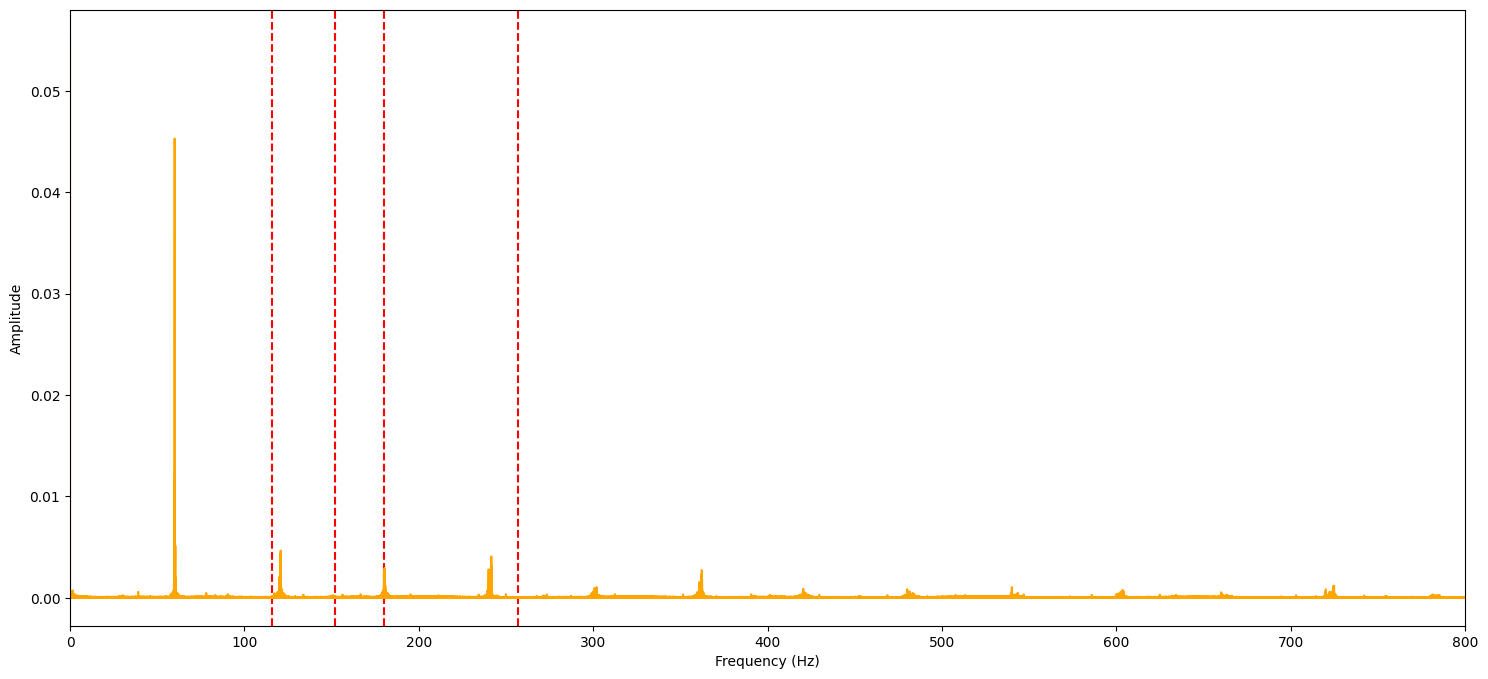

In [6]:
plt.figure(figsize=(18, 8))
plt.axvline(116, color='r', linestyle='--')
plt.axvline(257, color='r', linestyle='--')
plt.axvline(152, color='r', linestyle='--')
plt.axvline(180, color='r', linestyle='--')

plt.plot(faulty_freq, faulty_amplitude, color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 800)
#plt.ylim(0, 0.5e6)
plt.show()